# Estimating the real mortality rate for COVID-19

In this notebook, we attempt to estimate the mortality rate for COVID-19 (the "new coronavirus") while controlling for country-level covariates such as access to healthcare and age of population.

In [1]:
%matplotlib inline

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import pymc3 as pm

from source import data, model

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [2]:
df = data.get_all_data()
# Impute NA's column-wise
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [38]:
df = df[df['cases'] > 1000]

In [ ]:
print('Overall observed mortality rate: %.2f%%' % (100.0 * df['deaths'].sum() / df['cases'].sum()))

In [ ]:
pairs = pd.plotting.scatter_matrix(df[df.columns[2::]], figsize=(12, 12),
                        hist_kwds={'bins': 20}, s=80, alpha=.8)

In [56]:
import importlib
importlib.reload(model)
mod = model.initialize_model(df)


In [57]:
with mod:
    trace = pm.sample(1000, tune=500)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [tau, sig_0, mu_0]
Sampling 2 chains, 4 divergences: 100%|██████████| 3000/3000 [00:05<00:00, 576.55draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There was 1 divergence after tuning. Increase `target_accept` or reparameterize.


In [58]:
mod.logp(mod.test_point)


array(-2522.3229267)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11fed5f28>,
      dtype=object)

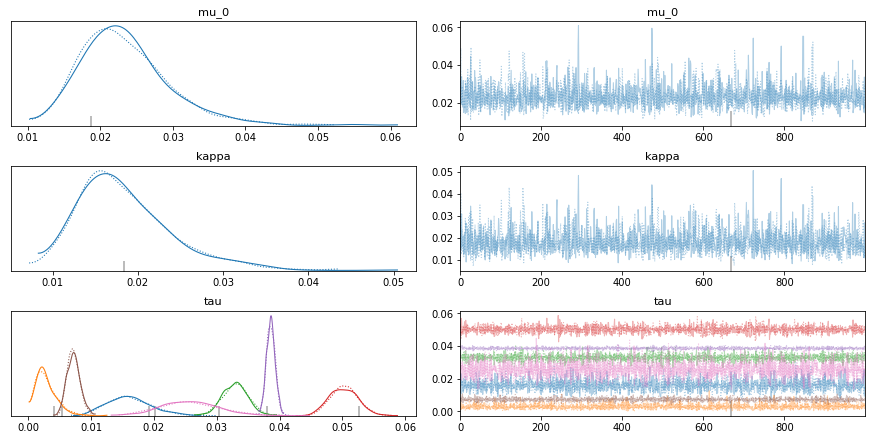

In [55]:
pm.traceplot(trace)


In [ ]:
mod.d_obs

In [39]:
len(df)

7